In [1]:
!pip install matplotlib pandas numpy sklearn seaborn;
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

import os
data = pd.read_csv('PJME_hourly.csv', index_col=[0], parse_dates=[0], dayfirst=False)
data['date'] = data.index

In [2]:
v1 = list((data[data.date=='2014-03-09 02:00:00']['PJME_MW'].values + data[data.date=='2014-03-09 04:00:00']['PJME_MW'].values) / 2)
print(v1)
# v2 = list((data['2015-03-08 02:00:00']['PJME_MW'].values + data['2015-03-08 04:00:00']['PJME_MW'].values) / 2)
# v3 = list((data['2016-03-13 02:00:00']['PJME_MW'].values + data['2016-03-13 04:00:00']['PJME_MW'].values) / 2)
# v4 = list((data['2017-03-12 02:00:00']['PJME_MW'].values + data['2017-03-12 04:00:00']['PJME_MW'].values) / 2)
v2 = list((data[data.date=='2015-03-08 02:00:00']['PJME_MW'].values + data[data.date=='2015-03-08 04:00:00']['PJME_MW'].values) / 2)
v3 = list((data[data.date=='2016-03-13 02:00:00']['PJME_MW'].values + data[data.date=='2016-03-13 04:00:00']['PJME_MW'].values) / 2)
v4 = list((data[data.date=='2017-03-12 02:00:00']['PJME_MW'].values + data[data.date=='2017-03-12 04:00:00']['PJME_MW'].values) / 2)
v =np.reshape([v1[0],v2[0],v3[0],v4[0]],(4,1))
v

df_data = pd.DataFrame(index = pd.to_datetime(pd.Series(['2014-03-09 03:00:00','2015-03-08 03:00:00','2016-03-13 03:00:00','2017-03-12 03:00:00'])), columns =['PJME_MW'] , data = v) 
df_data['date'] = df_data.index
df_data.head()
#
data = data.append(df_data,sort = False)

[24597.5]


In [3]:
# df = data.loc[count_data.iloc[:4].index]
# df_ = df.groupby('date').mean()
# df_['date'] = df_.index
# data.drop(count_data.iloc[:4].index)

data.drop_duplicates()
# data = data.append(df_,sort = False)

data = data.sort_index()

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['dayofmonth'] = data['date'].dt.day
data['quarter'] = data['date'].dt.quarter
data['dayofyear'] = data['date'].dt.dayofyear
data['weekofyear'] = data['date'].dt.isocalendar().week
data['dayofweek'] = data['date'].dt.dayofweek
data['hour'] = data['date'].dt.hour

In [4]:
data_i=pd.MultiIndex.from_arrays([data.index.date, data.index.time], names=['Date','Time'])
data.index = data_i
data.head()

PJME_MW                date  year  month  dayofmonth  \
Date       Time                                                             
2002-01-01 01:00:00  30393.0 2002-01-01 01:00:00  2002      1           1   
           02:00:00  29265.0 2002-01-01 02:00:00  2002      1           1   
           03:00:00  28357.0 2002-01-01 03:00:00  2002      1           1   
           04:00:00  27899.0 2002-01-01 04:00:00  2002      1           1   
           05:00:00  28057.0 2002-01-01 05:00:00  2002      1           1   

                     quarter  dayofyear  weekofyear  dayofweek  hour  
Date       Time                                                       
2002-01-01 01:00:00        1          1           1          1     1  
           02:00:00        1          1           1          1     2  
           03:00:00        1          1           1          1     3  
           04:00:00        1          1           1          1     4  
           05:00:00        1          1           1          1     5

In [5]:
data.drop( columns = 'date', inplace = True )
data.head()

PJME_MW  year  month  dayofmonth  quarter  dayofyear  \
Date       Time                                                             
2002-01-01 01:00:00  30393.0  2002      1           1        1          1   
           02:00:00  29265.0  2002      1           1        1          1   
           03:00:00  28357.0  2002      1           1        1          1   
           04:00:00  27899.0  2002      1           1        1          1   
           05:00:00  28057.0  2002      1           1        1          1   

                     weekofyear  dayofweek  hour  
Date       Time                                   
2002-01-01 01:00:00           1          1     1  
           02:00:00           1          1     2  
           03:00:00           1          1     3  
           04:00:00           1          1     4  
           05:00:00           1          1     5

In [6]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from datetime import timedelta
one_day = timedelta(days=1)
cal = calendar()
#инициализировали объект календарь
data['is_holiday'] = data.index.get_level_values('Date').isin([d.date() for d in cal.holidays()])
data['is_prev_holiday'] = data.index.get_level_values('Date').isin([( d.date() - one_day ) for d in cal.holidays()])
data['is_next_holiday'] = data.index.get_level_values('Date').isin([( d.date() + one_day ) for d in cal.holidays()])
data['is_holiday'] = data['is_holiday'].astype('uint8')
data['is_prev_holiday'] = data['is_prev_holiday'].astype('uint8')
data['is_next_holiday'] = data['is_next_holiday'].astype('uint8')

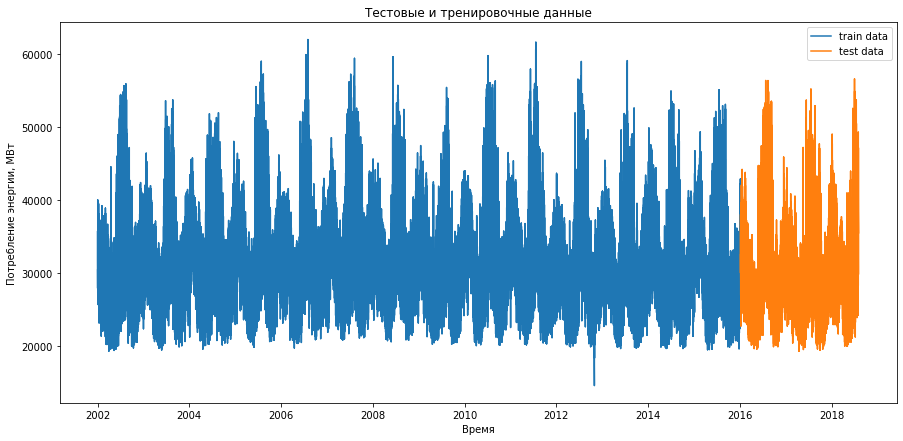

In [7]:
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

train, test = split_data( data, '01-06-2016')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['PJME_MW'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [8]:
start_f=0
X_train = train.iloc[:-1,start_f:]
y_train = train['PJME_MW'].values[1:]
X_test = test.iloc[:-1,start_f:]
y_test = test['PJME_MW'].values[1:]

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
model_g = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)
model_g.fit( X_train, y_train )
X_test_pred_g = model_g.predict(X_test)

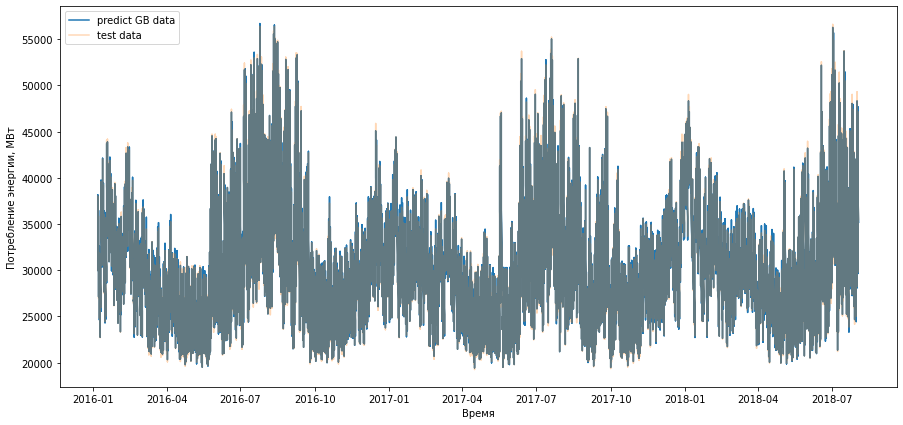

In [10]:
N=1
plt.figure( figsize=( 15, 7 ))

# plt.legend()
# plt.subplot(3,1,3)
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.iloc[N:,:].index.get_level_values('Date'),X_test_pred_g, label='predict GB data' )
plt.plot(test.iloc[N:,:].index.get_level_values('Date'),y_test, label='test data', alpha = 0.3)

plt.legend()
plt.show()

In [11]:
mean_squared_error(y_true=y_test, y_pred=X_test_pred_g)

226398.9223233428

In [12]:
!pip install flask-ngrok

In [13]:
!python.exe -m pip install --upgrade pip

In [14]:
from flask_ngrok import run_with_ngrok
from flask import Flask, request, jsonify

In [15]:
app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when app is run

@app.route("/")
def hello():
    return "Hello World!"

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://b4c3cd460b5f.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


In [22]:
#from sklearn.ensemble import GradientBoostingRegressor
#model_g = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)
#model_g.fit( X_train, y_train )
#X_test_pred_g = model_g.predict(X_test)

In [23]:
data

PJME_MW  year  month  dayofmonth  quarter  dayofyear  \
Date       Time                                                             
2002-01-01 01:00:00  30393.0  2002      1           1        1          1   
           02:00:00  29265.0  2002      1           1        1          1   
           03:00:00  28357.0  2002      1           1        1          1   
           04:00:00  27899.0  2002      1           1        1          1   
           05:00:00  28057.0  2002      1           1        1          1   
...                      ...   ...    ...         ...      ...        ...   
2018-08-02 20:00:00  44057.0  2018      8           2        3        214   
           21:00:00  43256.0  2018      8           2        3        214   
           22:00:00  41552.0  2018      8           2        3        214   
           23:00:00  38500.0  2018      8           2        3        214   
2018-08-03 00:00:00  35486.0  2018      8           3        3        215   

                     weekofyear  dayofweek  hour  is_holiday  is_prev_holiday  \
Date       Time                                                                 
2002-01-01 01:00:00           1          1     1           1                0   
           02:00:00           1          1     2           1                0   
           03:00:00           1          1     3           1                0   
           04:00:00           1          1     4           1                0   
           05:00:00           1          1     5           1                0   
...                         ...        ...   ...         ...              ...   
2018-08-02 20:00:00          31          3    20           0                0   
           21:00:00          31          3    21           0                0   
           22:00:00          31          3    22           0                0   
           23:00:00          31          3    23           0                0   
2018-08-03 00:00:00          31          4     0           0                0   

                     is_next_holiday  
Date       Time                       
2002-01-01 01:00:00                0  
           02:00:00                0  
           03:00:00                0  
           04:00:00                0  
           05:00:00                0  
...                              ...  
2018-08-02 20:00:00                0  
           21:00:00                0  
           22:00:00                0  
           23:00:00                0  
2018-08-03 00:00:00                0  

[145370 rows x 12 columns]

In [24]:
def get_model():
    return GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

def model_fit(model, x, y):
    return model.fit(x, y)

def get_y(model, x):
    return model.predict(x)

In [25]:
start_f=0
X_train = data.iloc[:-1,start_f:]
y_train = data['PJME_MW'].values[1:]
X_test = data.iloc[-1,start_f:]
y_test = data['PJME_MW'].values[-1]

In [26]:
X_test, y_test

(PJME_MW            35486
 year                2018
 month                  8
 dayofmonth             3
 quarter                3
 dayofyear            215
 weekofyear            31
 dayofweek              4
 hour                   0
 is_holiday             0
 is_prev_holiday        0
 is_next_holiday        0
 Name: (2018-08-03 00:00:00, 00:00:00), dtype: object,
 35486.0)

In [27]:
last = data[-1:]

In [ ]:
# Обработчики и запуск Flask
app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when app is run

train = data[:-1]

model = get_model()

@app.route('/init', methods=['GET', 'POST'])
def init():
#     try:
        model_fit(model, X_train, y_train)
        return jsonify({'model': id(model)})
#     except:
#         return 'Exception'


#       return jsonify({'ID':ID, 'value_Poisson':value_Poisson, 'value_Gamma':value_Gamma, 'value_BurningCost':value_BurningCost}) 


@app.route('/predict', methods=['GET', 'POST'])
def predict():
#     get_y(model, X_test.reshape(1, -1))
    json_input = request.json
    print(json_input)

    return jsonify({'ok':1})


if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://b4c3cd460b5f.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [30/Nov/2020 18:45:45] "POST /predict HTTP/1.1" 200 -


{'PJME_MW': 35486, 'year': 2018, 'month': 8, 'dayofmonth': 3, 'quarter': 3, 'dayofyear': 215, 'weekofyear': 31, 'dayofweek': 4, 'hour': 0, 'is_holiday': 0, 'is_prev_holiday': 0, 'is_next_holiday': 0}
